In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.semi_supervised import SelfTrainingClassifier
import numpy as np

In [2]:
df = pd.read_csv("./pima.csv")
print(df.head(), "\n")
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

(768, 9)


Text(0.5, 1.0, 'Distribution of Outcome')

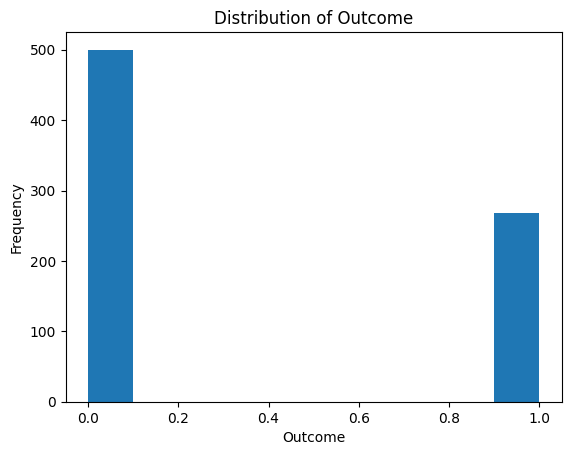

In [3]:
plt.hist(df['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Outcome')

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Columns: 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' take a minimum value equal to 0. These zeros are due to missing data

In [5]:
zero_attr = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for attr in zero_attr:
    df[attr] = df[attr].replace(0, df[attr].median())

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=700, random_state=42)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [8]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train, y_train)
svm_clf = SVC(random_state=42)
bgn_clf = BaggingClassifier(estimator=svm_clf, random_state=42, n_estimators=10)
bgn_clf.fit(X_train_sc, y_train) #Support vector machines are highly sensitive to feature scaling, that's why we use the scaled set. 
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100, learning_rate=0.25, random_state=42)
ada_clf.fit(X_train, y_train)

/home/stavros/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                   learning_rate=0.25, n_estimators=100, random_state=42)

In [9]:
models = [tree_clf, rnd_clf, bgn_clf, ada_clf]
model_names = ["Decision Tree Classifier", "Random Forest Classifier", "Bagging Classifier", "Ada Boost Classifier"]
print(f"{'Model':<25} {'Precision':<10} {'Recall':<10} {'F1 Score':<10} {'Confusion Matrix':<10}")
print("-" * 80)
for model, name in zip(models, model_names):
    if model == bgn_clf:
        y_pred = model.predict(X_test_sc)
    else:
        y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    con_mat = confusion_matrix(y_test, y_pred)

    print(f"{name:<25} {precision:<10.3f} {recall:<10.3f} {f1:<10.3f} {con_mat}")
    

Model                     Precision  Recall     F1 Score   Confusion Matrix
--------------------------------------------------------------------------------
Decision Tree Classifier  0.545      0.500      0.522      [[34 10]
 [12 12]]
Random Forest Classifier  0.750      0.750      0.750      [[38  6]
 [ 6 18]]
Bagging Classifier        0.652      0.625      0.638      [[36  8]
 [ 9 15]]
Ada Boost Classifier      0.619      0.542      0.578      [[36  8]
 [11 13]]


The random forest model has the best performance across all metrics followed by the bagging classifier. Both decision tree classifier and Ada Boost classifier are a little better than a random guesser, with Ada Boost being slightly better.

In [10]:
base_est = RandomForestClassifier(random_state=42)
slt_clf = SelfTrainingClassifier(base_estimator=base_est, criterion='threshold', threshold=0.99)

In [11]:
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    X_train, y_train, train_size=200, random_state=42, stratify=y_train
)
y_unlabeled[:] = -1

In [12]:
base_est.fit(X_labeled, y_labeled)

RandomForestClassifier(random_state=42)

In [13]:
slt_clf.fit(np.vstack((X_labeled, X_unlabeled)), np.hstack((y_labeled, y_unlabeled)))

SelfTrainingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                       threshold=0.99)

In [14]:
y_base_pred = base_est.predict(X_test)
y_slt_pred = slt_clf.predict(X_test)

/home/stavros/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelfTrainingClassifier was fitted without feature names
  warnings.warn(


In [15]:
precision = precision_score(y_test, y_base_pred)
recall = recall_score(y_test, y_base_pred)
f1 = f1_score(y_test, y_base_pred)
con_mat = confusion_matrix(y_test, y_base_pred)
print(f"{'Model':<25} {'Precision':<10} {'Recall':<10} {'F1 Score':<10} {'Confusion Matrix':<10}")
print("-" * 80)
print(f"{'Random Forest':<25} {precision:<10.3f} {recall:<10.3f} {f1:<10.3f} {con_mat}")

precision = precision_score(y_test, y_slt_pred)
recall = recall_score(y_test, y_slt_pred)
f1 = f1_score(y_test, y_slt_pred)
con_mat = confusion_matrix(y_test, y_slt_pred)
print(f"{'Self Training Classifier':<25} {precision:<10.3f} {recall:<10.3f} {f1:<10.3f} {con_mat}")


Model                     Precision  Recall     F1 Score   Confusion Matrix
--------------------------------------------------------------------------------
Random Forest             0.750      0.625      0.682      [[39  5]
 [ 9 15]]
Self Training Classifier  0.750      0.625      0.682      [[39  5]
 [ 9 15]]


The random forest and the self training classifier have the same performance on this dataset although the self training classifier is trained on both labeled and unlabeled data.